In [1]:
using Revise
using Reparam

In [19]:
# Need to include plotters for surfaces outside of Reparam, 
# since PyPlot and Plots.jl do not play nice with each other.
include("../src/visual_surface.jl")

plot_contourf (generic function with 2 methods)

In [76]:
g(x) = [x[1], x[2], x[1]^2 - x[2]^2]
θ(x) = 0.5 * π * sin(π*x[1]) * sin(π*x[2])
ψ(x) = [
    (x[1] - 0.5) * cos(θ(x)) - (x[2] - 0.5) * sin(θ(x)) + 0.5,
    (x[1] - 0.5) * sin(θ(x)) + (x[2] - 0.5) * cos(θ(x)) + 0.5
]

f(x) =  g(ψ(x))
af = Reparam.area_scaling(f)
ag = Reparam.area_scaling(g)

#31 (generic function with 1 method)

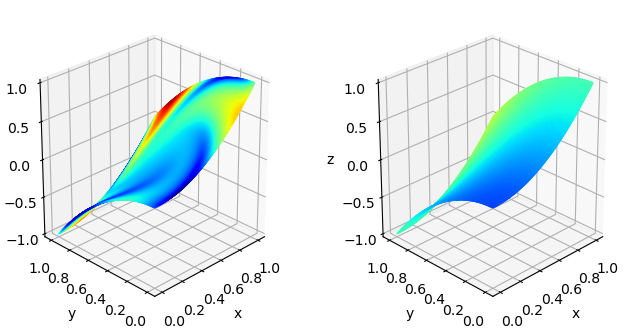

In [77]:
fig = figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")

plot_parametric_surface(f, n_points=100, axis=ax1,  colorfunc=af, shade=false, rstride=1, cstride=1)
plot_parametric_surface(g, n_points=100, axis=ax2,  colorfunc=ag, rel_colorfunc=af, shade=false, rstride=1, cstride=1)
show()

In [82]:
q = Qmap2D(f)
r = Qmap2D(g)

I = GaussLegendre2D(32)
proj = Reparam.FourierVectorProjector(1)
@time res, rn =  reparametrize(q, r, proj; I=I, rtol=1e-6);

 ----------------------------------------------------------------------------------
| Iter | Error            | εmax             | εi               | ||dγ||           | |f_i - f_{i-1}|/ |fi| | 
----------------------------------------------------------------------------------
|    0 | 2.4841388437e-01 |                  |                  |                  |
|    1 | 1.1037098097e-01 | 5.5090376801e-02 | 2.7545188401e-02 | 1.5603029870e+00 | 5.5569721374e-01 |
|    2 | 4.3100031133e-02 | 1.0776563330e-01 | 5.3882816652e-02 | 6.5688809646e-01 | 6.0949852258e-01 |
|    3 | 4.2541167674e-02 | 2.1699058707e-01 | 7.9093068987e-02 | 9.9718009583e-01 | 1.2966660208e-02 |
|    4 | 4.1230930744e-02 | 1.2299890563e-01 | 3.2683330703e-02 | 8.1977056280e-01 | 3.0799270477e-02 |
|    5 | 4.0834574378e-02 | 1.6309112118e-01 | 3.1592420959e-02 | 6.8710159571e-01 | 9.6130831579e-03 |
|    6 | 3.9600276188e-02 | 1.7830630101e-01 | 2.7977203303e-02 | 4.7205451629e-01 | 3.0226792103e-02 |
|    7 | 3.912

## Plot Diffeomorphism 

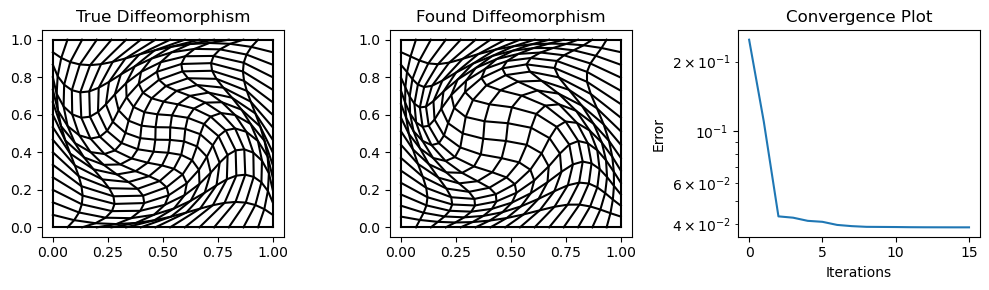

In [84]:
γ = rn.γ
gafter(x) = g(γ(x))
agafter = Reparam.area_scaling(gafter)

fig = figure(figsize=(10, 3))
ax1 = fig.add_subplot(131)
plot_diffeomorphism(ψ, n_points=15, axis=ax1)
title("True Diffeomorphism")

ax2 = fig.add_subplot(132)

plot_diffeomorphism(γ, n_points=15, axis=ax2)
title("Found Diffeomorphism")

ax3 = fig.add_subplot(133)
ax3.semilogy(res.errors)
xlabel("Iterations")
title("Convergence Plot")
ylabel("Error")

tight_layout()
show()

## Comparison After Reparametrization

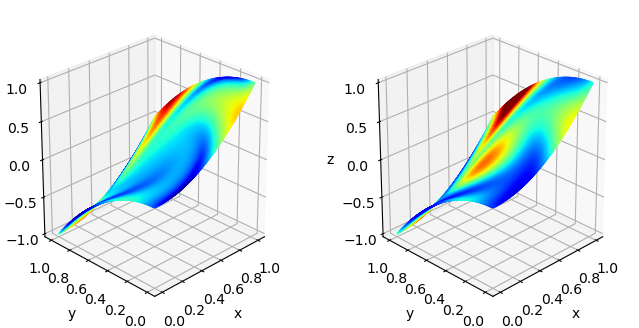

In [85]:
fig = figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122, projection="3d")

plot_parametric_surface(f, n_points=100, axis=ax1,  colorfunc=af, shade=false, rstride=1, cstride=1)
plot_parametric_surface(gafter, n_points=100, axis=ax2,  colorfunc=agafter, rel_colorfunc=af, shade=false, rstride=1, cstride=1)
show()